# Problema 1:

Los siguientes datos

In [1]:
x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])


es una muestra de una distribución coseno:
$$f(x)=C\frac{1}{2\pi}(1+\cos(x/a-b))$$
para $$-\pi < x/a-b <\pi$$ y donde C es una constante de normalización.

"a" se conoce como la escala y "b" como la localización.

Estima los parámetros "a" y "b" a partir de los datos y da un intervalo de confianza para ellos del 95%.

## Respuesta:

In [3]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import t, chi2

# Datos
x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import t, chi2

# Creamos un histograma normalizado
num_bins = 20  # número de bins
hist, edges = np.histogram(x, bins=num_bins, density=True)
bin_centers = (edges[:-1] + edges[1:]) / 2

# Definir la función de distribución coseno
def coseno(x, a, b, C):
    return C * (1 / (2 * np.pi)) * (1 + np.cos(x / a - b))

# Ajustamos el histograma a la función coseno
popt, pcov = curve_fit(coseno, bin_centers, hist)

# Extraemos los parámetros ajustados
a, b, C = popt

# Calculamos los intervalos de confianza del 95%
alpha = 0.05  # Nivel de confianza del 95%
n = len(x)  # Número de observaciones
p = len(popt)  # Número de parámetros
dof = max(0, n - p)  # Grados de libertad
tval = t.ppf(1.0 - alpha / 2.0, dof)  # Valor t para el intervalo de confianza

# Extraemos los errores estándar y calcular los márgenes de error
sigma_ab = np.sqrt(np.diag(pcov))
me_ab = tval * sigma_ab

# Calculamos los intervalos de confianza
ci_a = a - me_ab[0], a + me_ab[0]
ci_b = b - me_ab[1], b + me_ab[1]

# Imprimimos los resultados
print("Estimación de parámetros:")
print(f"a = {a}, b = {b}, C = {C}")
print("Intervalos de confianza del 95%:")
print(f"Para a: {ci_a}")
print(f"Para b: {ci_b}")

Estimación de parámetros:
a = 1.7293715604332551, b = 1.1594507872993032, C = 0.6290858207805181
Intervalos de confianza del 95%:
Para a: (0.9626467025566807, 2.4960964183098295)
Para b: (0.38293151402176173, 1.9359700605768446)


Este código crea un histograma normalizado de los datos x y ajusta la función de distribución coseno a dicho histograma. Los intervalos de confianza y las estimaciones de los parámetros se calculan de la misma manera que antes, pero ahora se basan en el histograma en lugar de los valores de y.

# Problema 2:

Con la misma secuencia de datos del problema anterior x. I**magína que no conoces la distribución de donde proviene la muestra**. Estima el primer momento de la distribución $\mu=\bar{x}$ (promedio) y enstima el intervalo de confianza del 95%.

## Respuesta:

In [4]:
import numpy as np
from scipy.stats import sem, t

# Calculamos el promedio
mean_x = np.mean(x)

# Calculamos el error estándar de la media
sem_x = sem(x)

# Calculamos el intervalo de confianza del 95%
alpha = 0.05  # Nivel de confianza del 95%
n = len(x)  # Número de observaciones
dof = n - 1  # Grados de libertad
tval = t.ppf(1.0 - alpha / 2.0, dof)  # Valor t para el intervalo de confianza
margin_of_error = tval * sem_x

# Calculamos los límites del intervalo de confianza
ci_lower = mean_x - margin_of_error
ci_upper = mean_x + margin_of_error

# Imprimimos los resultados
print("Estimación del promedio:")
print(f"mu = {mean_x}")
print("Intervalo de confianza del 95%:")
print(f"({ci_lower}, {ci_upper})")

Estimación del promedio:
mu = 2.1342042433999997
Intervalo de confianza del 95%:
(1.795202751766069, 2.4732057350339307)


# Problema 3:

Supongamos que deseas analizar la diferencia en las calificaciones obtenidas por tres grupos de estudiantes en un examen de matemáticas. Los grupos son: "Grupo A", "Grupo B" y "Grupo C". Tienes los datos de las calificaciones obtenidas por cada estudiante en un archivo CSV llamado "calificaciones.csv". 

Haz una prueba Anova para ver si hay diferencia en calificaciones de los tres grupos.

# Respuesta:

In [43]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Importamos los datos
calificaciones = pd.read_csv('calificaciones.csv')
calificaciones

,Grupo,Estudiante,Calificación
0,Grupo A,Estudiante 1,8.6
1,Grupo A,Estudiante 2,7.9
2,Grupo A,Estudiante 3,6.5
3,Grupo A,Estudiante 4,9.1
4,Grupo A,Estudiante 5,8.0
5,Grupo A,Estudiante 6,7.2
6,Grupo B,Estudiante 7,6.9
7,Grupo B,Estudiante 8,7.4
8,Grupo B,Estudiante 9,8.2
9,Grupo B,Estudiante 10,7.8


In [37]:
#Agrupamos por grupos
grouped = calificaciones.groupby('Grupo')

#Sacamos los valores del grupo A
groupA = grouped.get_group('Grupo A')
column_name = 'Calificación'
valuesA = groupA[column_name].to_numpy()

#Sacamos los valores del grupo B
groupB = grouped.get_group('Grupo B')
valuesB = groupB[column_name].to_numpy()

#Sacamos los valores del grupo C
groupC = grouped.get_group('Grupo C')
valuesC = groupC[column_name].to_numpy()
print(valuesA, valuesB, valuesC)


[8.6 7.9 6.5 9.1 8.  7.2] [6.9 7.4 8.2 7.8 6.7 8.3] [9.2 8.6 7.7 8.9 9.  9.5]


In [44]:

# Realizamos la prueba ANOVA
f_value, p_value = stats.f_oneway(valuesA, valuesB, valuesC)

# Imprimimos los resultados
print("Resultados de la prueba ANOVA:")
print(f"F-value: {f_value}")
print(f"P-value: {p_value}")

# Interpretamos el P-value
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Existen diferencias significativas entre los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre los grupos.")


Resultados de la prueba ANOVA:
F-value: 7.068004927487539
P-value: 0.006877947837761902
Se rechaza la hipótesis nula. Existen diferencias significativas entre los grupos.


# Problema 4:

Supongamos que tienes dos grupos de datos: "Grupo A" y "Grupo B", y deseas determinar si hay una diferencia significativa entre las medianas de ambos grupos. No sabes si los datos provienene de distribución normal.

a) Has una prueba gráfica y una prueba de hipótsis para saber si los datos tienen una distribución normal para ambos grupos.

b) Emplea estadística no paramétrica para probar si hay diferencia significativa en la mediana entre ambos grupos.

Los datos están en el archivo datos.csv

## Respuesta:

### Prueba de Shapiro-Wilk
La prueba de Shapiro-Wilk es una prueba estadística que se utiliza para evaluar si una muestra de datos proviene de una distribución normal (también conocida como gaussiana). Es una prueba de bondad de ajuste que compara los datos observados con una distribución normal teórica y determina si hay una diferencia significativa entre ellos.

La prueba de Shapiro-Wilk se basa en la hipótesis nula de que la muestra sigue una distribución normal. La prueba calcula un valor estadístico (W) y un valor de probabilidad asociado (p-valor). El valor W varía entre 0 y 1, y un valor cercano a 1 sugiere que los datos siguen una distribución normal.

Se compara el p-valor con un nivel de significancia predefinido (generalmente 0.05). Si el p-valor es menor que el nivel de significancia, se rechaza la hipótesis nula, lo que indica que los datos no provienen de una distribución normal. Si el p-valor es mayor que el nivel de significancia, no se puede rechazar la hipótesis nula, lo que sugiere que los datos podrían seguir una distribución normal.

La prueba de Shapiro-Wilk es sensible a pequeñas desviaciones de la normalidad, por lo que puede ser útil para detectar diferencias sutiles en la distribución de los datos. Sin embargo, también puede ser más propensa a errores de tipo I (rechazar falsamente la hipótesis nula) en comparación con otras pruebas, especialmente cuando se trabaja con muestras más grandes.

### Prueba de Mann-Whitney U

La prueba de Mann-Whitney U, también conocida como prueba de suma de rangos de Wilcoxon o prueba de Wilcoxon-Mann-Whitney, es una prueba estadística no paramétrica que se utiliza para evaluar si hay una diferencia significativa entre las distribuciones de dos grupos independientes. A diferencia de la prueba t de Student, la prueba de Mann-Whitney U no requiere que los datos sigan una distribución normal, por lo que es especialmente útil cuando no se cumplen los supuestos necesarios para aplicar pruebas paramétricas.

La prueba de Mann-Whitney U se basa en la hipótesis nula de que la probabilidad de que una observación del grupo A sea mayor que una observación del grupo B es igual a la probabilidad de que una observación del grupo B sea mayor que una observación del grupo A. En otras palabras, la hipótesis nula establece que las distribuciones de ambos grupos son iguales y no hay diferencia en sus ubicaciones (por ejemplo, medianas).

Para realizar la prueba de Mann-Whitney U, primero se asignan rangos a todas las observaciones de ambos grupos combinados. Luego, se calcula la suma de los rangos para cada grupo y, a partir de estas sumas, se obtiene el estadístico U. Finalmente, se calcula un p-valor asociado a U.

Si el p-valor es menor que un nivel de significancia predefinido (generalmente 0.05), se rechaza la hipótesis nula, lo que indica que hay una diferencia significativa entre las distribuciones de los dos grupos. Si el p-valor es mayor que el nivel de significancia, no se puede rechazar la hipótesis nula, lo que sugiere que no hay una diferencia significativa entre las distribuciones de ambos grupos.

In [40]:
datos = pd.read_csv('datos.csv')
datos

,Grupo,Datos
0,Grupo A,5.8
1,Grupo A,3.1
2,Grupo A,7.2
3,Grupo A,2.6
4,Grupo A,6.7
5,Grupo A,4.5
6,Grupo B,1.9
7,Grupo B,8.5
8,Grupo B,4.3
9,Grupo B,6.8


In [41]:
grouped = datos.groupby('Grupo')
groupA = grouped.get_group('Grupo A')
column_name = 'Datos'
valuesA = groupA[column_name].to_numpy()
groupB = grouped.get_group('Grupo B')
valuesB = groupB[column_name].to_numpy()

print(valuesA, valuesB)


[5.8 3.1 7.2 2.6 6.7 4.5] [1.9 8.5 4.3 6.8 2.1 7.4]


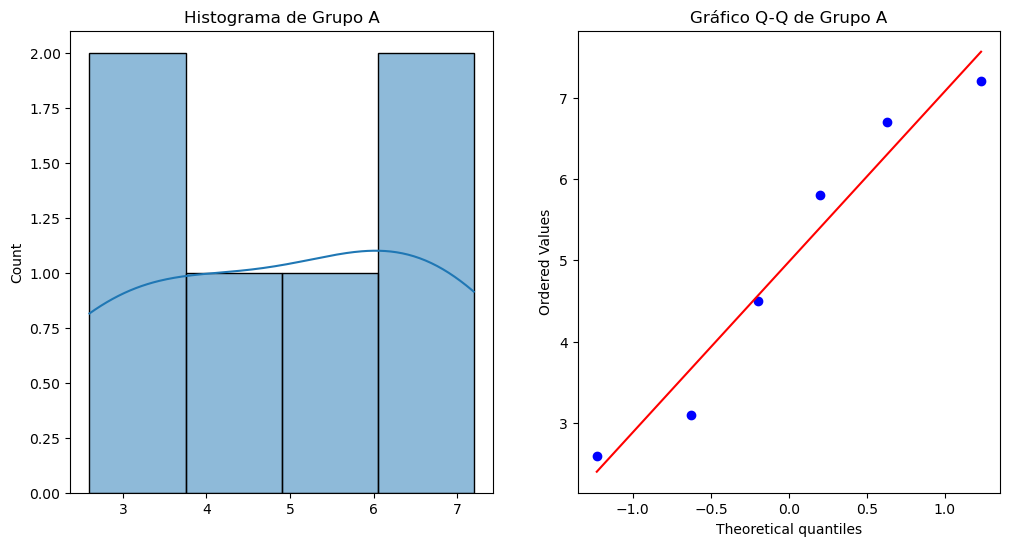

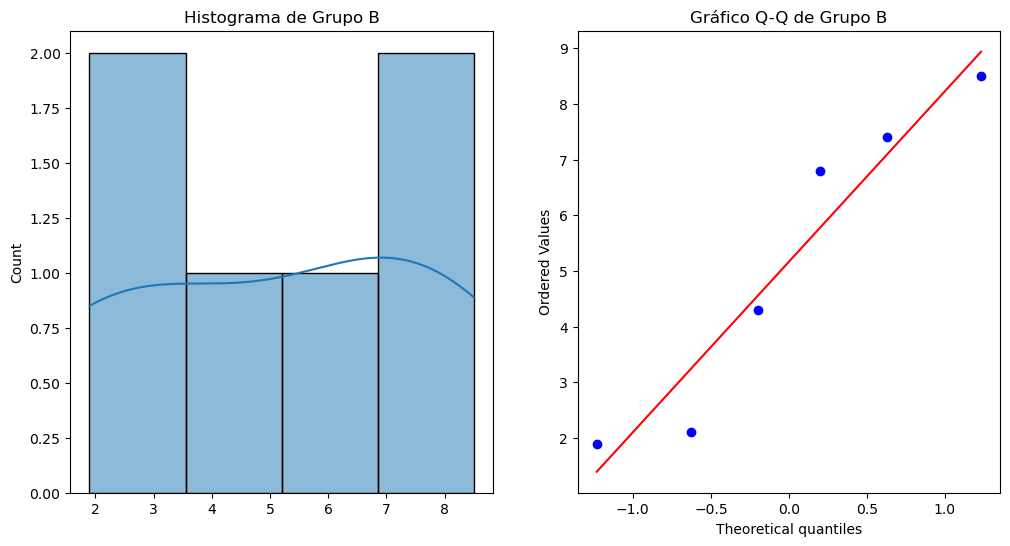

Prueba de Shapiro-Wilk para Grupo A: W-statistic = 0.9267434477806091, p-value = 0.5551981329917908
Prueba de Shapiro-Wilk para Grupo B: W-statistic = 0.8947595953941345, p-value = 0.34388110041618347
Grupo A: No se rechaza la hipótesis nula. Los datos siguen una distribución normal.
Grupo B: No se rechaza la hipótesis nula. Los datos siguen una distribución normal.

Prueba de Mann-Whitney U: U-statistic = 17.0, p-value = 0.9372294372294373
No se rechaza la hipótesis nula. No hay una diferencia significativa en la mediana entre ambos grupos.


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# a) Prueba gráfica y prueba de hipótesis para saber si los datos tienen una distribución normal
# Histograma y gráfico Q-Q
def plot_histogram_qq(data, group_name):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'Histograma de {group_name}')

    plt.subplot(1, 2, 2)
    stats.probplot(data, dist='norm', plot=plt)
    plt.title(f'Gráfico Q-Q de {group_name}')

    plt.show()

plot_histogram_qq(valuesA, 'Grupo A')
plot_histogram_qq(valuesB, 'Grupo B')

# Prueba de Shapiro-Wilk para normalidad
alpha = 0.05
shapiro_A = stats.shapiro(valuesA)
shapiro_B = stats.shapiro(valuesB)

print(f"Prueba de Shapiro-Wilk para Grupo A: W-statistic = {shapiro_A[0]}, p-value = {shapiro_A[1]}")
print(f"Prueba de Shapiro-Wilk para Grupo B: W-statistic = {shapiro_B[0]}, p-value = {shapiro_B[1]}")

if shapiro_A[1] < alpha:
    print("Grupo A: Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.")
else:
    print("Grupo A: No se rechaza la hipótesis nula. Los datos siguen una distribución normal.")

if shapiro_B[1] < alpha:
    print("Grupo B: Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.")
else:
    print("Grupo B: No se rechaza la hipótesis nula. Los datos siguen una distribución normal.")

# b) Estadística no paramétrica para probar si hay diferencia significativa en la mediana entre ambos grupos
# Prueba de Mann-Whitney U
u_statistic, p_value = stats.mannwhitneyu(valuesA, valuesB)

print(f"\nPrueba de Mann-Whitney U: U-statistic = {u_statistic}, p-value = {p_value}")

if p_value < alpha:
    print("Se rechaza la hipótesis nula. Existe una diferencia significativa en la mediana entre ambos grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay una diferencia significativa en la mediana entre ambos grupos.")